In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm



X est la matrice des donn´ees (de taille n ˆ p), k le nombre de clusters souhait´e, M une matrice contenant les centro¨ıdes initiaux (de taille k ˆp), et maxit d´efinit le nombre maximal d’it´erations accept´e. Lorsque l’utilisateur ne fournit pas la matrice M des centro¨ıdes initiaux (donc M is None est vraie), l’algorithme devra la construire en choisissant al´eatoirement (avec probabilit´e uniforme) k donn´ees parmi les n fournies.

In [37]:
def kmeans(X, k, M=None, maxit=100):
    n, p = X.shape
    if M is None:
        random_indices = np.random.choice(n, size = k, replace=False)
        M = X[random_indices]

    for it in range(maxit):

        # --- MAJ DE Z --- #
        D = np.linalg.norm(X[:, np.newaxis, :] - M[np.newaxis, :, :], axis=2)

        # assigne les clusters  
        C = np.argmin(D, axis=1)

        Z_new = np.zeros((n, k), dtype=int)

        Z_new[np.arange(n), C] = 1
        
        # --- MAJ DE M --- #
        
        M_new = np.zeros_like(M)

        M_new = Z_new.T @ X
        counts = Z_new.sum(axis=0)[:, np.newaxis]
        M_new = M_new / counts

        # for j in range(k):
        #     count = Z_new[:, j].sum()
        #     if count > 0:
        #         M_new[j] = (Z_new[:, j][:, None] * X).sum(axis=0) / count
        #     else:
        #         M_new[j] = M[j]

        # convergence check
        if np.allclose(M, M_new):
            break
        M = M_new

    return M, C

D’abord, tirer n1 “ 50 ´echantillons d’une loi normale Npm`,σ2Iq et n2 “80´echantillons d’une loi normale Npm´,σ2Iq, avec m˘ “ p˘1,˘1qT et σ2 “ 0.3. Chacune de ces distributions r´epresente un cluster. Appliquer l’algorithme `a l’ensemble des donn´ees, tracer les r´esultats (sous forme de scatterplot, o`u on indiquera les clusters trouv´es par l’algorithme en code couleur) et calculer le taux d’erreur de classification :

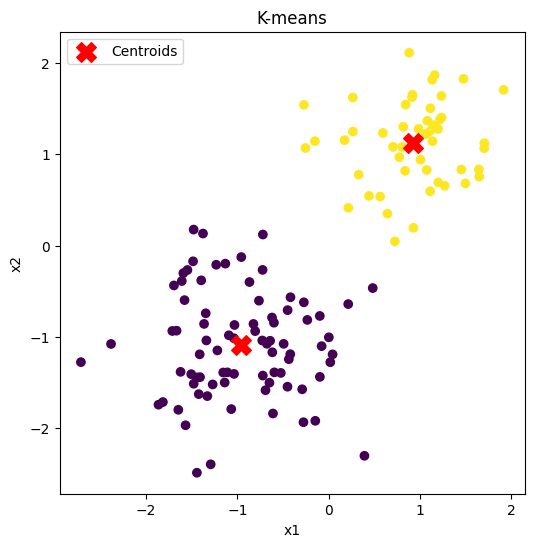

In [53]:
n1 = 50
m_p = [1, 1]

n2 = 80
m_m = [-1,-1]

sigma_2 = 0.3
X1 = norm.rvs(loc=m_p, scale=np.sqrt(sigma_2), size=(n1, 2))
X2 = norm.rvs(loc=m_m, scale=np.sqrt(sigma_2), size=(n2, 2))

X = np.vstack((X1, X2))

n, p = X.shape
k = 2

M, C = kmeans(X, k)

plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=C)
plt.scatter(M[:, 0], M[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

